# Time Series Visualizations from AQI Data in S3 Bucket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource

In [2]:
sns.set(rc = {'axes.facecolor':'white',
              "axes.edgecolor":'black',    
            "xtick.bottom":True,
            "xtick.top":False,
            "ytick.left":True,
            "ytick.right":False,
            "axes.linewidth":0.2,
            "xtick.major.width":0.2,
            "ytick.major.width":0.2,
            "xtick.minor.width":0.2,
            "ytick.minor.width":0.2,
            "font.size":10,
            "axes.labelsize":10,
            "axes.titlesize":10,
            "xtick.labelsize":10,
            "ytick.labelsize":10,
            "legend.fontsize":10,
            "legend.title_fontsize":10,
            "lines.linewidth":1,
            "patch.linewidth":0.2,
            "patch.edgecolor":'black',
            "patch.force_edgecolor":True,
            "xtick.major.size":3,
            "ytick.major.size":3,
            "xtick.minor.size":1,
            "ytick.minor.size":1,
            "xtick.minor.width":0.2,
            "ytick.minor.width":0.2})

In [3]:
californiab39 = pd.read_csv("California_1.csv")
california310f = pd.read_csv("California_2.csv")

C:\Users\alexa\AppData\Local\Temp\ipykernel_14636\1475625846.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  californiab39 = pd.read_csv("California_1.csv")
C:\Users\alexa\AppData\Local\Temp\ipykernel_14636\1475625846.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  california310f = pd.read_csv("California_2.csv")


In [4]:
# concat csv
cali = pd.concat([californiab39, california310f])
 
# convert UTC to datetime object
cali['UTC']  = pd.to_datetime(cali['UTC'])

#replace 999 with Nan
cali.replace(-999, np.nan, inplace=True)

In [5]:
# limit the number of unique locations to N
N = 5
 
# generate a tuple of Latitude and Longitude to represent unique location
cali['Location'] = cali.apply(lambda x: (x['Latitude'],x['Longitude']),axis=1)
 
# get a list of the locations with the top N observations
top_N = cali['Location'].value_counts()[0:N]

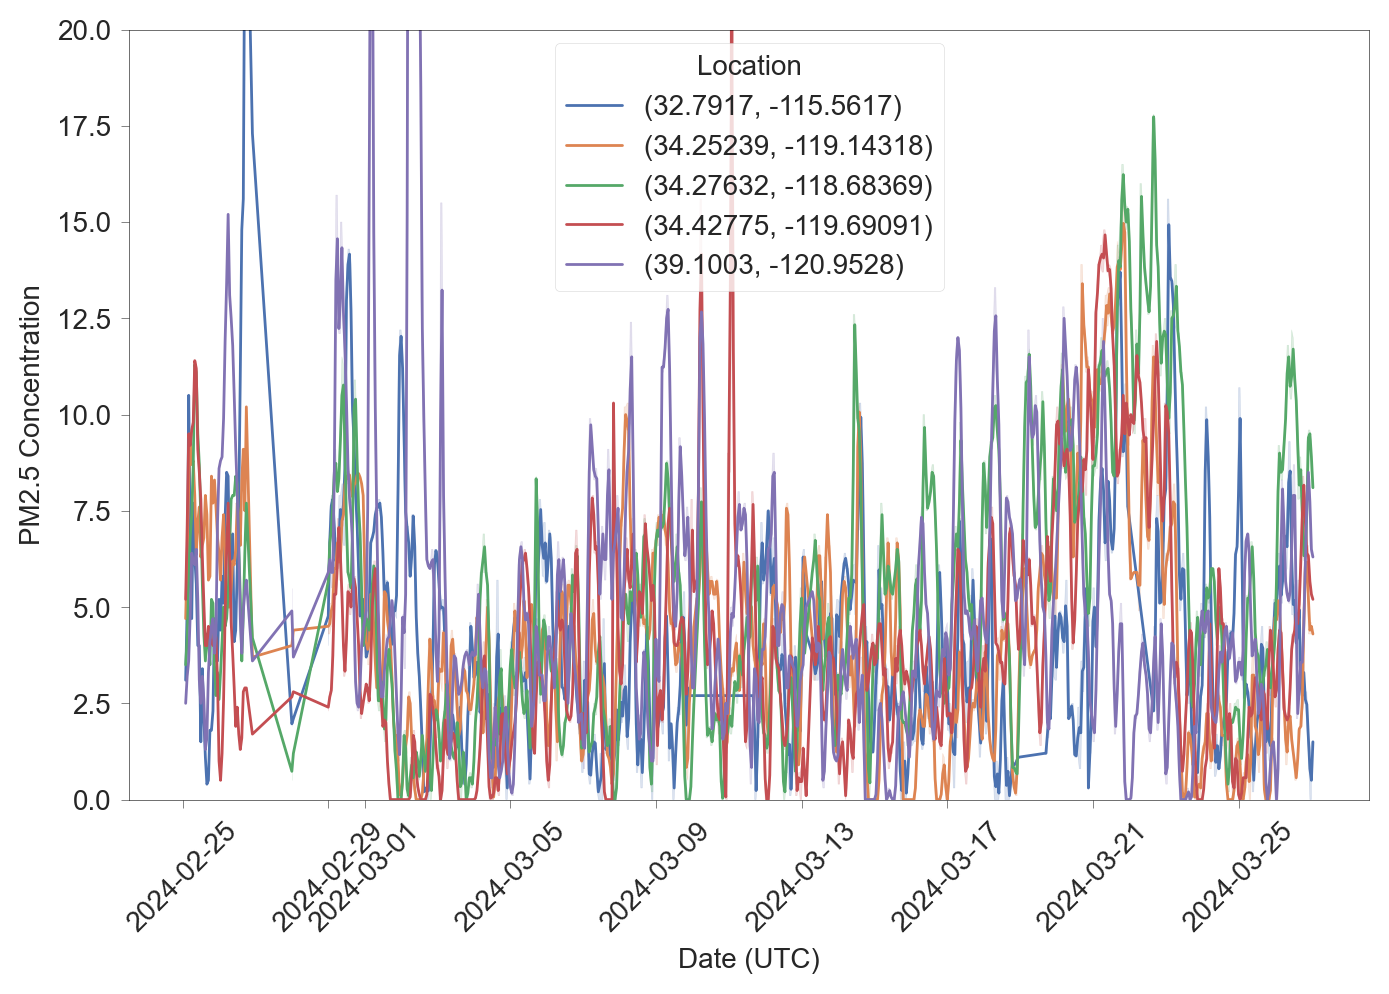

In [6]:
# plot PM2.5 over time for only those locations
plt.figure(figsize=(8,5),dpi=200)
sns.lineplot(data = cali.loc[cali['Location'].isin(top_N.index)], x = 'UTC',y='Value_PM2.5',hue='Location')
plt.ylim([0,20])
plt.xticks(rotation=45)
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date (UTC)')

plt.savefig('aqi_time_series.png', dpi=300) 

plt.show()

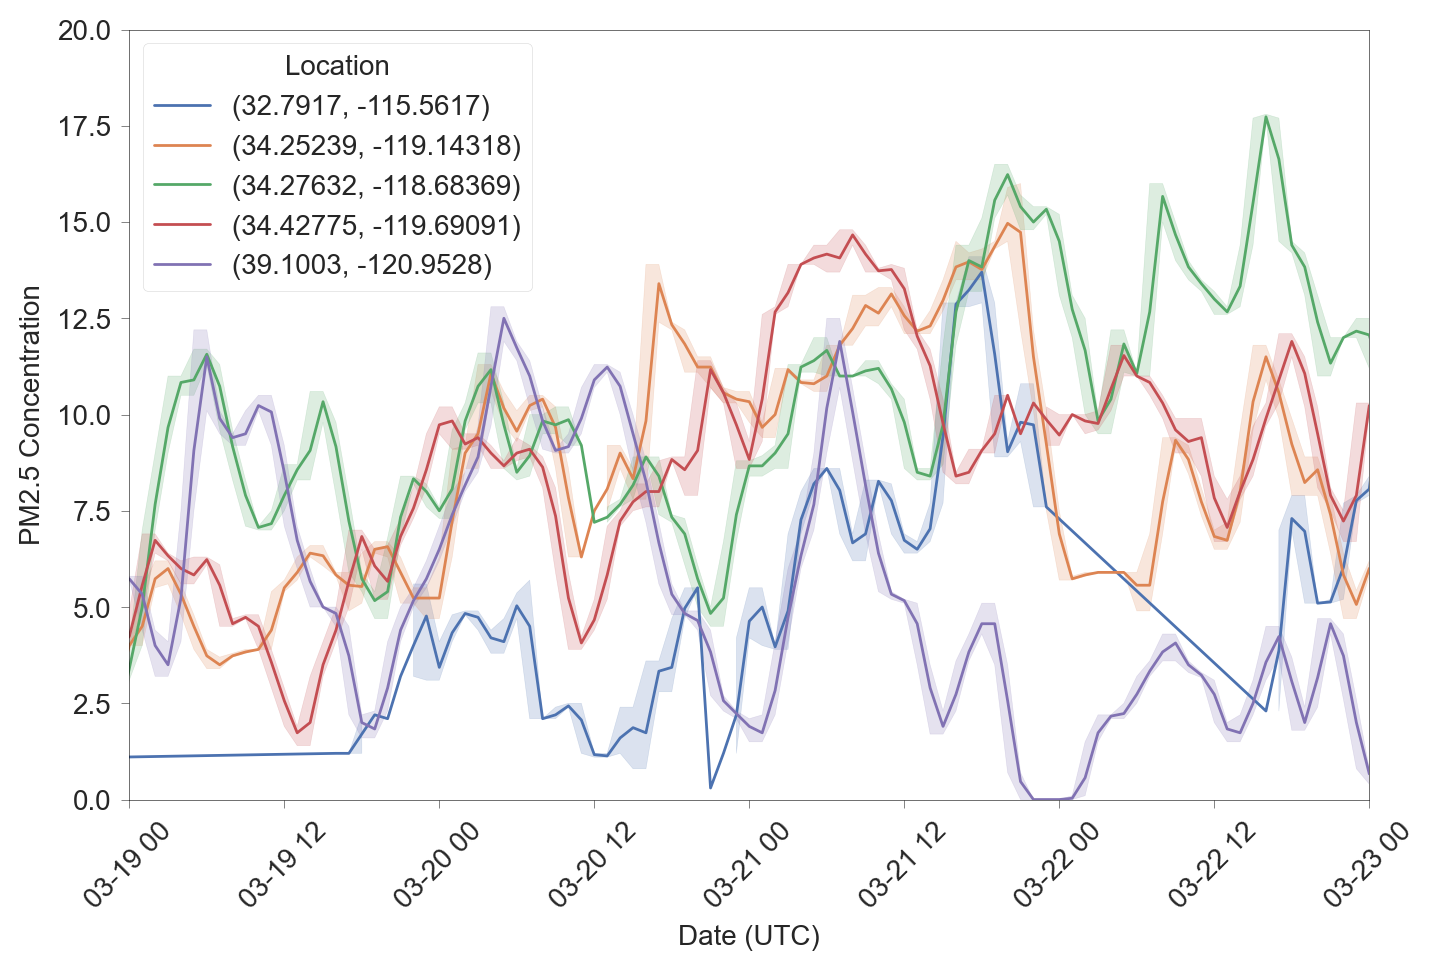

In [7]:
# plot PM2.5 over time for only those locations
plt.figure(figsize=(8,5),dpi=200)
sns.lineplot(data = cali.loc[cali['Location'].isin(top_N.index)], x = 'UTC',y='Value_PM2.5',hue='Location')
plt.ylim([0,20])
plt.xlim([pd.to_datetime('2024-03-19 00:00:00'),pd.to_datetime('2024-03-23 00:00:00')])
plt.xticks(rotation=45)
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date (UTC)')

plt.savefig('aqi_time_series_zoom.png', dpi=300) 

plt.show()

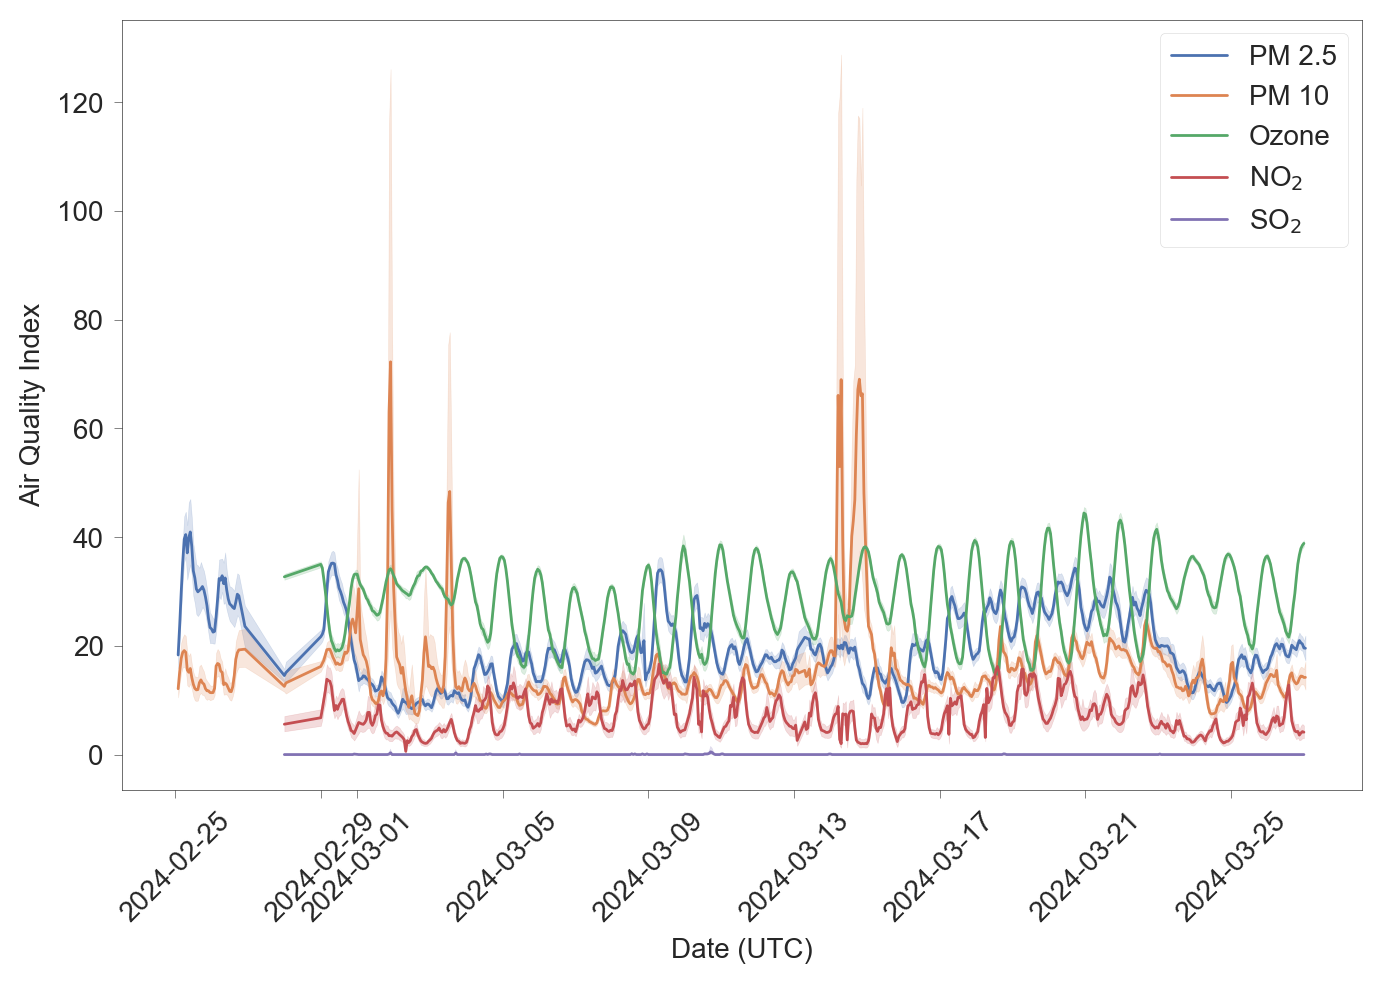

In [8]:
# plot PM2.5 over time for only those locations
cali = cali.reset_index()
plt.figure(figsize=(8,5),dpi=200)
sns.lineplot(data = cali, x = 'UTC',y='AQI_PM2.5',label='PM 2.5')
sns.lineplot(data = cali, x = 'UTC',y='AQI_PM10',label='PM 10')
sns.lineplot(data = cali, x = 'UTC',y='AQI_OZONE',label='Ozone')
sns.lineplot(data = cali, x = 'UTC',y='AQI_NO2',label='NO$_2$')
sns.lineplot(data = cali, x = 'UTC',y='AQI_SO2',label='SO$_2$')
plt.xticks(rotation=45)
plt.ylabel('Air Quality Index')
plt.xlabel('Date (UTC)')

plt.savefig('aqi_time_series_all_polutants.png', dpi=300) 

plt.show()

# Box Plot

In [9]:
# limit the number of unique locations to N
N = 10

# get a list of the locations with the top N observations
top_N = cali['Location'].value_counts()[0:N]

#subset data to just locations n
cali2 = cali.loc[cali['Location'].isin(top_N.index)]

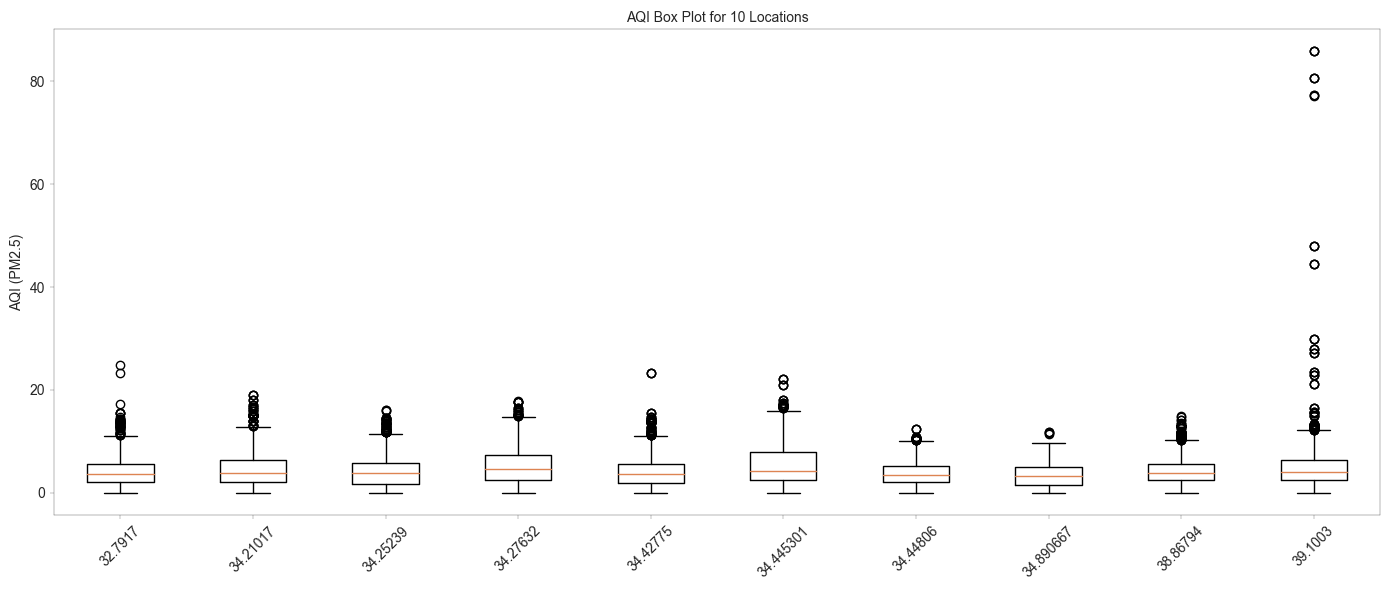

In [10]:
# Remove rows with NaN values in 'Value_PM2.5' column
cali_cleaned = cali2.dropna(subset=['Value_PM2.5'])

# Group data by location and extract 'Value_PM2.5'
data = [group['Value_PM2.5'] for _, group in cali_cleaned.groupby('Location')]

# Create a box plot
plt.figure(figsize=(14, 6)) 
plt.boxplot(data)

# Add labels and title
plt.xticks(range(1, len(data) + 1), [group[0] for group in cali_cleaned.groupby('Location').groups.keys()], rotation=45)  
plt.ylabel('AQI (PM2.5)')
plt.title('AQI Box Plot for 10 Locations')

# Display the plot
plt.grid(True)
plt.tight_layout()  

plt.savefig('aqi_box_plot.png', dpi=300) 

plt.show()

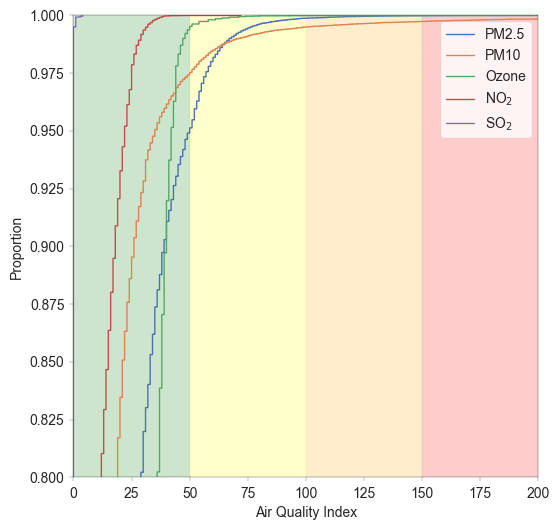

In [11]:
plt.figure(figsize=(6,6),dpi=100)
sns.ecdfplot(data=cali, x='AQI_PM2.5',label='PM2.5')
sns.ecdfplot(data=cali, x='AQI_PM10',label='PM10')
sns.ecdfplot(data=cali, x='AQI_OZONE',label='Ozone')
sns.ecdfplot(data=cali, x='AQI_NO2',label='NO$_2$')
sns.ecdfplot(data=cali, x='AQI_SO2',label='SO$_2$')
plt.axvspan(0, 50, alpha=0.2, color='green')
plt.axvspan(50, 100, alpha=0.2, color='yellow')
plt.axvspan(100, 150, alpha=0.2, color='orange')
plt.axvspan(150, 200, alpha=0.2, color='red')
plt.legend()
plt.xlim([0, 200])
plt.ylim([0.8, 1])
plt.xlabel('Air Quality Index')

plt.savefig('California Distribution of AQI.png',dpi=300)